<a href="https://colab.research.google.com/github/souvik150/NLP-TextSummarization/blob/master/TextSummarizaiton_LuhnAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization - Luhn algorithm

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

* The more words in same grp the more imp the sentence is

In [13]:
import re
import nltk
import string
import heapq

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
original_text = """Artificial intelligence is human like intelligence machines.
                   It is the study of intelligent artificial agents.
                   Science and engineering to produce intelligent machines.
                   Solve problems and have intelligence.
                   Related to intelligent behavior machines.
                   Developing of reasoning machines.
                   Learn from mistakes and successes.
                   Artificial intelligence is related to reasoning in everyday situations."""
original_text = re.sub(r'\s+', ' ', original_text)
original_text

'Artificial intelligence is human like intelligence machines. It is the study of intelligent artificial agents. Science and engineering to produce intelligent machines. Solve problems and have intelligence. Related to intelligent behavior machines. Developing of reasoning machines. Learn from mistakes and successes. Artificial intelligence is related to reasoning in everyday situations.'

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stopwords.append('explanation')

In [19]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [21]:
formatted_text = preprocess(original_text)
formatted_text

'artificial intelligence human like intelligence machines study intelligent artificial agents science engineering produce intelligent machines solve problems intelligence related intelligent behavior machines developing reasoning machines learn mistakes successes artificial intelligence related reasoning everyday situations'

# Function to calculate sentences score

In [22]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:

    word_index = []
    for word in important_words:

      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 2]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

# Function to summarize the texts

In [23]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score

In [24]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [25]:
original_sentences

['Artificial intelligence is human like intelligence machines.',
 'It is the study of intelligent artificial agents.',
 'Science and engineering to produce intelligent machines.',
 'Solve problems and have intelligence.',
 'Related to intelligent behavior machines.',
 'Developing of reasoning machines.',
 'Learn from mistakes and successes.',
 'Artificial intelligence is related to reasoning in everyday situations.']

In [26]:
best_sentences

['Learn from mistakes and successes.',
 'Related to intelligent behavior machines.',
 'Science and engineering to produce intelligent machines.']

In [27]:
sentences_score

[(2.0, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (1.0, 5), (3.0, 6)]

In [28]:
from IPython.core.display import HTML

In [29]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

# Extracting texts from the Internet

In [30]:
!pip install goose3
from goose3 import Goose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=fc39426088d192bc538df0b4359baa05b2f37b41150a7a8f6f50a4ee5a0b5862
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [31]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'
article = g.extract(url)

In [32]:
article.cleaned_text

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.\n\nText summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms. Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (key-frames), and/or the most important vi

In [33]:
original_sentences, best_sentences, score_sentences = summarize(article.cleaned_text, 300, 10, 120)

In [34]:
len(original_sentences)

303

In [35]:
visualize(article.title, original_sentences,  best_sentences)

# Extracting articles from RSS feeds

- AI feeds: https://blog.feedspot.com/ai_rss_feeds/

In [36]:
!pip install feedparser

In [37]:
import feedparser

In [38]:
from bs4 import BeautifulSoup
import os
import json

In [39]:
url = 'https://www.aitrends.com/feed/'
feed = feedparser.parse(url)

In [40]:
feed.entries

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://www.aitrends.com/feed/',
   'value': 'Best Practices for Building the AI Development Platform in Government'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/'}],
  'link': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/',
  'authors': [{'name': 'Allison Proffitt'}],
  'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'published': 'Thu, 28 Oct 2021 23:20:17 +0000',
  'published_parsed': time.struct_time(tm_year=2021, tm_mon=10, tm_mday=28, tm_hour=23, tm_min=20, tm_sec=17, tm_wday=3, tm_yday=301, tm_isdst=0),
  'tags': [{'term': 'AI World Government', 'scheme': None, 'label': None},
   {'

In [41]:
for e in feed.entries:
  print(e.title)
  print(e.content[0].value)
  print('-------')

Best Practices for Building the AI Development Platform in Government
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the </span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span> event held in-person and virtually from Alexandria, Va., last week.</span><span> </span><span> </span></p>
<figure class="wp-caption alignleft" id="attachment_21162" style="width: 168px;"><img alt="" class="size-full wp-image-21162" height="289" src="https://www.aitrends.com/wp

In [42]:
def clean_html(text):
  if text == '':
    return ''
  else:
    return BeautifulSoup(text, 'html5lib').get_text()

In [43]:
articles = []
for e in feed.entries:
  articles.append({'title': e.title, 'content': clean_html(e.content[0].value)})

In [44]:
save_file = os.path.join('feed.json')
feed = open(save_file, 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()

In [ ]:
blog_articles = json.loads(open('feed.json').read())
blog_articles

# Word cloud

In [46]:
feed_content = ''
for article in blog_articles:
  feed_content += article['content']

In [47]:
formatted_feed_content = preprocess(feed_content)
formatted_feed_content

'john p. desmond ai trends editor ai stack defined carnegie mellon university fundamental approach taken us army ai development platform efforts according isaac faber chief data scientist us army ai integration center speaking ai world government event held in-person virtually alexandria va. last week isaac faber chief data scientist us army ai integration center “ want move army legacy systems digital modernization one biggest issues found difficulty abstracting away differences applications ” said “ important part digital transformation middle layer platform makes easier cloud local computer. ” desire able move software platform another platform ease new smartphone carries user ’ contacts histories ethics cuts across layers ai application stack positions planning stage top followed decision support modeling machine learning massive data management device layer platform bottom “ advocating think stack core infrastructure way applications deployed siloed approach ” said “ need create d

In [49]:
len(feed_content), len(formatted_feed_content)

(102389, 71570)

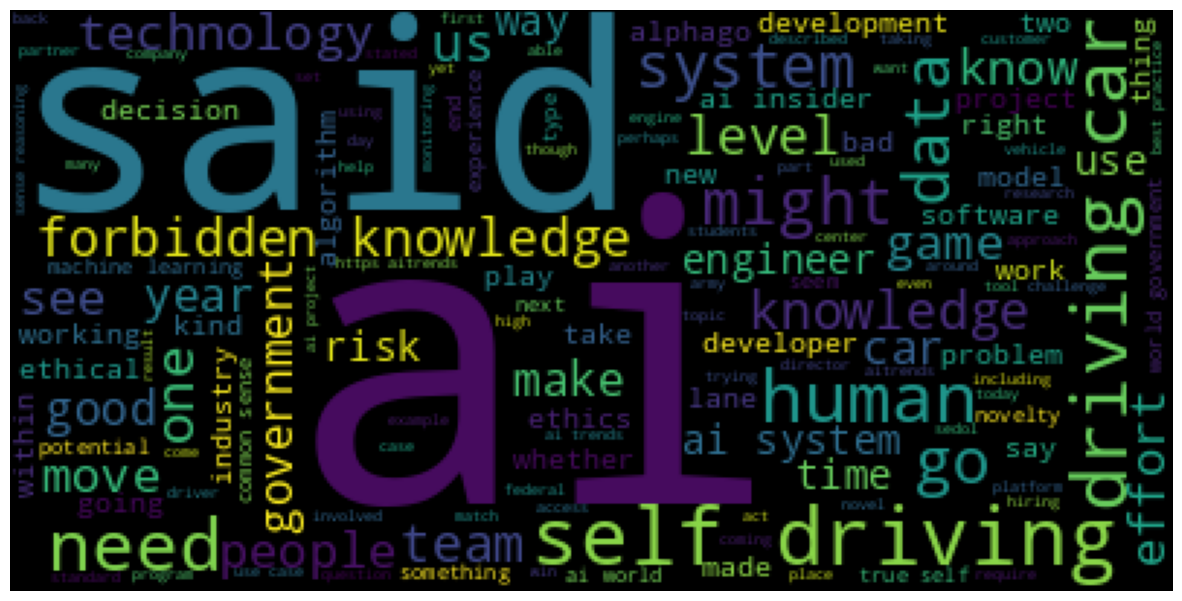

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(WordCloud().generate(formatted_feed_content));

# Extracting named entities

- Acronyms: https://spacy.io/api/annotation#named-entities

In [58]:
import spacy

In [60]:
nlp = spacy.load('en_core_web_sm')
nlp

In [61]:
document = nlp(formatted_feed_content)

In [62]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [63]:
for entity in document.ents:
  if entity.label_ == 'GPE':
    print(entity.text, entity.label_)

alexandria va GPE
south jordan GPE
utah GPE
hamburg germany “ GPE
oakland GPE
calif GPE
california GPE
tenn. GPE
alumina GPE
berkeley GPE
california GPE
san francisco GPE
san francisco GPE
san francisco GPE
ballpark forbidden knowledge GPE


In [67]:
for article in blog_articles:
  #print(article)
  original_sentences, best_sentences, _ = summarize(article['content'], 150, 10, number_of_sentences=5, percentage=0.5)
  visualize(article['title'], original_sentences, best_sentences)
  save_summary(article['title'], original_sentences, best_sentences)

In [66]:
def save_summary(title, original_sentences, best_sentences):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  text = ''
  for sentence in original_sentences:
    if sentence in best_sentences:
      text += str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += sentence

  save_file = open(os.path.join(title + '.html'), 'wb')
  html_file = HTML_TEMPLATE.format(title, text)
  save_file.write(html_file.encode('utf-8'))
  save_file.close()